This will serve as the sandbox, so smash the castles you don't need anymore alicia

In [236]:
# let's create our final data set:

import pandas as pd

from project_functions import *
import numpy as np

In [237]:
# cities = pd.read_csv('uscities.csv')
data = pd.read_csv('music_with_lyrics.csv')

In [238]:
data.head()

,Artist,Song,Wave,Year,Lyrics,Original Lyrics,Unnamed: 6,Unnamed: 7
0,Bikini Kill,Double Dare Ya,3,2014,[Intro]\nIs that supposed to be doing that? Ok...,NaN,NaN,NaN
1,Gossip,Where the Girls Are,3,2001,[Intro]\nThat's where I'll be\nWhere the girls...,NaN,NaN,NaN
2,Bratmobile,Love Thing,3,1993,Admit it;\r\nInnocent little girls turn you on...,NaN,NaN,NaN
3,Lunachicks,Bitterness Barbie,3,1995,Why must I stand on my toes?\r\nPerfect smile ...,NaN,NaN,NaN
4,"Cicely Hamilton, Ethel Smyth",The March of the Women,1,1910,"Shout, shout, up with your song!\nCry with the...",NaN,NaN,NaN


In [239]:
data = data[['Artist','Song','Wave','Lyrics']]

In [240]:
data.sample(5)

,Artist,Song,Wave,Lyrics
26,"Gertrude ""Ma"" Rainey",Cell Bound Blues,1,"[Verse 1]\r\nHey, hey, jailer, tell me what ha..."
19,Beyonce,Pretty Hurts,3,[Intro: Harvey Keitel & Beyoncé]\r\nMs. Third ...
67,Billie Eilish,What Was I Made For?,3,"[Verse 1]\nI used to float, now I just fall do..."
46,Alanis Morissette,You Oughta Know,2,[Verse 1]\nI want you to know that I'm happy f...
0,Bikini Kill,Double Dare Ya,3,[Intro]\nIs that supposed to be doing that? Ok...


In [241]:
# one issue i see will be all the newline characters, but we can filter those out: 

data['Lyrics'] = data['Lyrics'].str.replace(pat = '[ \n|\r|\t]', repl = ' ', regex = True)

In [256]:
# cool, not let's get rid of all the verses and such: 
pattern = '\[\w+\s?\w*\s?\d?\]'

data['Lyrics'] = data['Lyrics'].str.replace(pat = pattern, repl = '', regex = True)

In [243]:
# let's also drop lyrics with no data for this visualization: 

data = data[data['Lyrics'] != 'NODATA ']

In [244]:
# okay now let's get lyrics as one string if we can: 

In [257]:
wave1_all_lyrics = data[data['Wave'] == 1]['Lyrics'].sum()
wave2_all_lyrics = data[data['Wave'] == 2]['Lyrics'].sum()
wave3_all_lyrics = data[data['Wave'] == 3]['Lyrics'].sum()

In [267]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from nltk.util import bigrams

In [247]:
stop_words = set(stopwords.words('english'))

In [258]:
word_tokenize(wave1_all_lyrics)


['Shout',
 ',',
 'shout',
 ',',
 'up',
 'with',
 'your',
 'song',
 '!',
 'Cry',
 'with',
 'the',
 'wind',
 ',',
 'for',
 'the',
 'dawn',
 'is',
 'breaking',
 'March',
 ',',
 'march',
 ',',
 'swing',
 'you',
 'along',
 'Wide',
 'blows',
 'our',
 'banner',
 ',',
 'and',
 'hope',
 'is',
 'waking',
 'Song',
 'with',
 'its',
 'story',
 ',',
 'dreams',
 'with',
 'their',
 'glory',
 '``',
 'Lo',
 '!',
 "''",
 'they',
 'call',
 ',',
 'and',
 'glad',
 'is',
 'their',
 'word',
 '!',
 'Loud',
 'and',
 'louder',
 'it',
 'swells',
 'Thunder',
 'of',
 'freedom',
 ',',
 'the',
 'voice',
 'of',
 'the',
 'Lord',
 '!',
 'Long',
 ',',
 'long—we',
 'in',
 'the',
 'past',
 'Cowered',
 'in',
 'dread',
 'from',
 'the',
 'light',
 'of',
 'heaven',
 'Strong',
 ',',
 'strong—stand',
 'we',
 'at',
 'last',
 'Fearless',
 'in',
 'faith',
 'and',
 'with',
 'sight',
 'new',
 'given',
 'Strength',
 'with',
 'its',
 'beauty',
 ',',
 'life',
 'with',
 'its',
 'duty',
 '(',
 'Hear',
 'the',
 'voice',
 ',',
 'oh',
 'hear

In [249]:
filtered = [tok for tok in word_tokenize(wave1_all_lyrics) if tok not in stop_words ]

In [250]:
filtered

['Shout',
 ',',
 'shout',
 ',',
 'song',
 '!',
 'Cry',
 'wind',
 ',',
 'dawn',
 'breaking',
 'March',
 ',',
 'march',
 ',',
 'swing',
 'along',
 'Wide',
 'blows',
 'banner',
 ',',
 'hope',
 'waking',
 'Song',
 'story',
 ',',
 'dreams',
 'glory',
 '``',
 'Lo',
 '!',
 "''",
 'call',
 ',',
 'glad',
 'word',
 '!',
 'Loud',
 'louder',
 'swells',
 'Thunder',
 'freedom',
 ',',
 'voice',
 'Lord',
 '!',
 'Long',
 ',',
 'long—we',
 'past',
 'Cowered',
 'dread',
 'light',
 'heaven',
 'Strong',
 ',',
 'strong—stand',
 'last',
 'Fearless',
 'faith',
 'sight',
 'new',
 'given',
 'Strength',
 'beauty',
 ',',
 'life',
 'duty',
 '(',
 'Hear',
 'voice',
 ',',
 'oh',
 'hear',
 'obey',
 '!',
 ')',
 'These',
 ',',
 'these—beckon',
 'us',
 '!',
 'Open',
 'eyes',
 'blaze',
 'day',
 'Comrades—ye',
 'dared',
 'First',
 'battle',
 'strive',
 'sorrow',
 '!',
 'Scorned',
 ',',
 'spurned—nought',
 'ye',
 'cared',
 'Raising',
 'eyes',
 'wider',
 'morrow',
 'Ways',
 'weary',
 ',',
 'days',
 'dreary',
 'Toil',
 'pain

In [270]:
stemmer = SnowballStemmer('english')

In [280]:
stemmed = [stemmer.stem(f) for f in filtered]
type(stemmed)

list

In [251]:
# !pip install wordcloud

In [252]:
import wordcloud as wc
import matplotlib.pyplot as plt

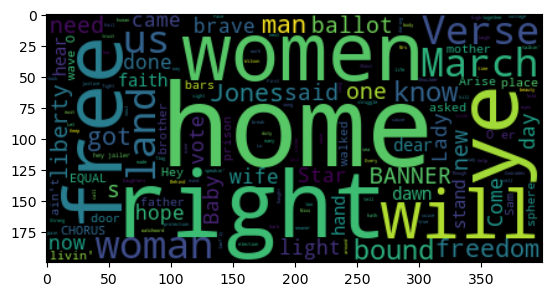

In [253]:
wordcloud = wc.WordCloud().generate(wave1_all_lyrics)
plt.imshow(wordcloud, interpolation = 'bilinear')

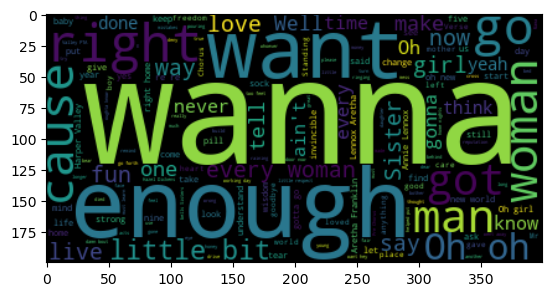

In [276]:
wordcloud = wc.WordCloud().generate(wave2_all_lyrics)
plt.imshow(wordcloud, interpolation = 'bilinear')

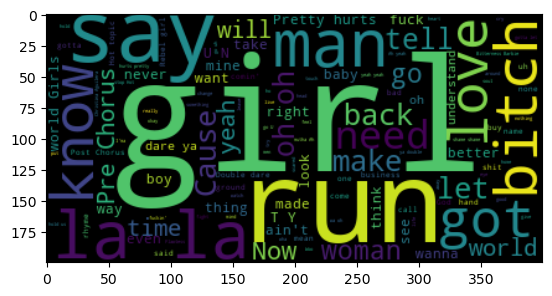

In [277]:
wordcloud = wc.WordCloud().generate(wave3_all_lyrics)
plt.imshow(wordcloud, interpolation = 'bilinear')

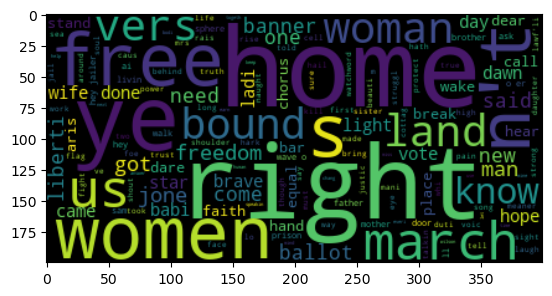

In [296]:
# all songs:

wordcloud = wc.WordCloud().generate(stemmed_str)
plt.imshow(wordcloud, interpolation = 'bilinear')

In [343]:
stemmed_str = ' '.join(stemmed)

filtered_str = ' '.join(filtered)

In [299]:
from PIL import Image

In [335]:
mask = np.array(Image.open('woman.jpg'))

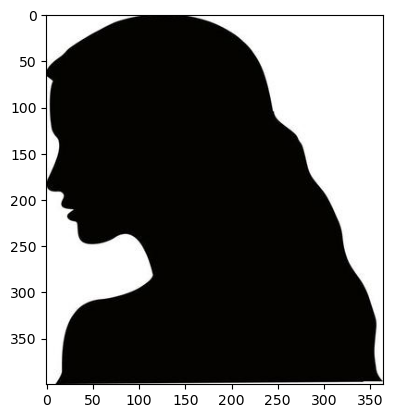

In [336]:
plt.imshow(mask)

In [361]:
mask = np.array(Image.open('woman.jpg'))
cloud = wc.WordCloud(scale = 8,
                     colormap = 'winter', 
                     mask = mask, 
                     background_color = 'white',
                    collocations = True).generate_from_text(stemmed_str)

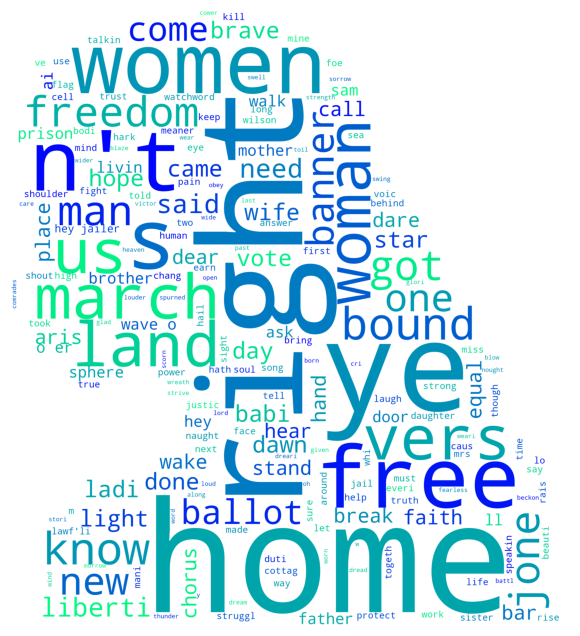

In [362]:
plt.figure(figsize = (8,8))
plt.imshow(cloud)
plt.axis('off')
plt.show()

In [355]:
cloud = wc.WordCloud(scale = 8,
                     colormap = 'Reds', 
                     mask = mask, 
                     background_color = 'white',
                    collocations = True).generate_from_text(filtered_str)

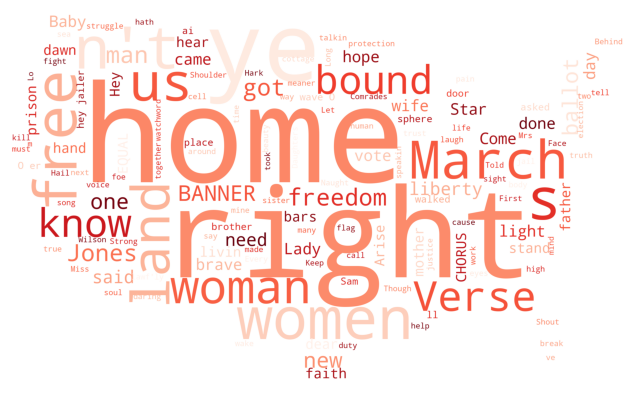

In [356]:
plt.figure(figsize = (8,8))
plt.imshow(cloud)
plt.axis('off')
plt.show()

In [348]:
mask = np.array(Image.open('usa.jpg'))

In [353]:
cloud = wc.WordCloud(scale = 8,
                     colormap = 'PuRd', 
                     mask = mask, 
                     background_color = 'white',
                    collocations = True).generate_from_text(filtered_str)

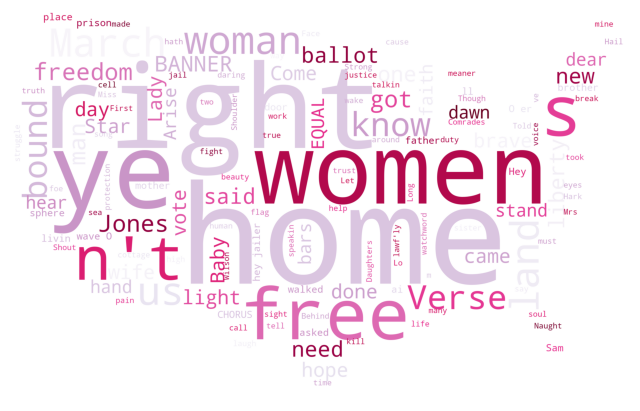

In [354]:
plt.figure(figsize = (8,8))
plt.imshow(cloud)
plt.axis('off')
plt.show()

In [367]:
mask = np.array(Image.open('Screenshot 2024-06-21 232940.png'))

cloud = wc.WordCloud(scale = 8,
                     colormap = 'winter', 
                     mask = mask, 
                     background_color = 'white',
                    collocations = True).generate_from_text(filtered_str)

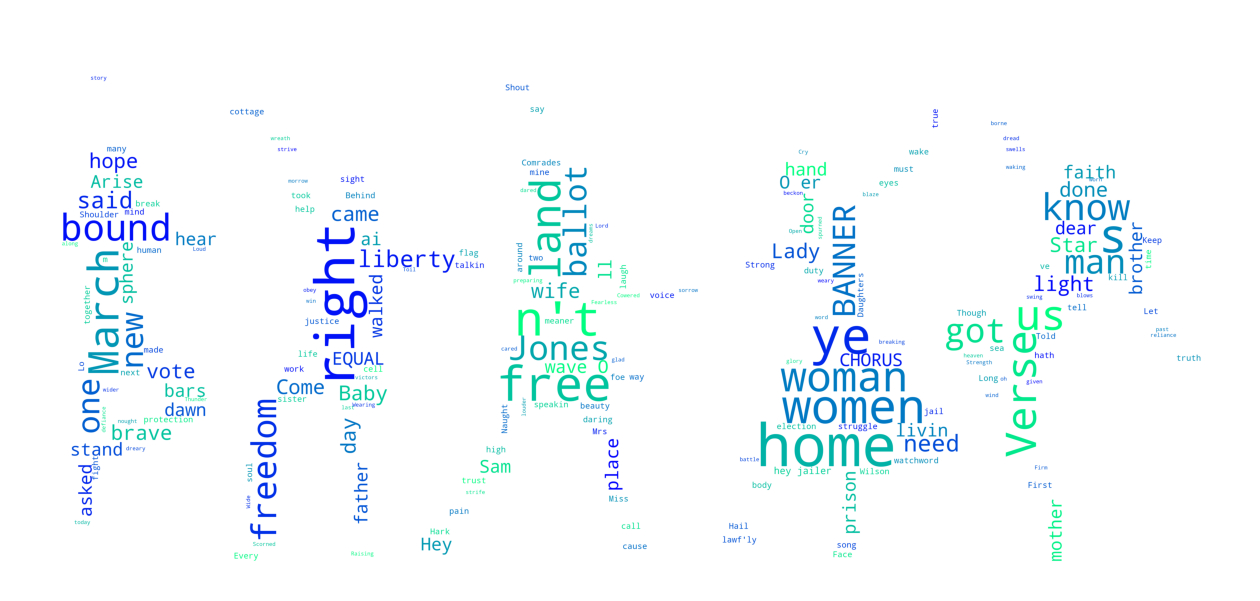

In [370]:
plt.figure(figsize = (16,10))
plt.imshow(cloud)
plt.axis('off')
plt.show()

In [371]:
# niceee